In [1]:
#!pip install Pillow
#!pip install fpdf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

In [2]:
#załadowanie plików do odczytu przez windows explorer
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

files = filedialog.askopenfilenames()

In [4]:
def clean(df):
    df = df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]).reset_index(drop = True)
    return df

def make_df(file):
    df = pd.read_table(file,header = None)
    df = df.drop([0,1,2,3,4,5,6,7,10,15,16]).reset_index(drop = True)
    return df

In [8]:
#załadowane dane łączy w jeden DataFrame
df = pd.concat(list(pd.read_table(f,header = None) for f in files),axis=1)
#wyrzucenie zbędnych wierszy
df = df.drop([0,1,2,3,4,5,6,7,10,15,16]).reset_index(drop = True)
df

,0,1,0,1
0,X position (mm),7.500000,X position (mm),7.750000
1,Y position (mm),0.000000,Y position (mm),0.000000
2,Remanence (mdeg),152.669851,Remanence (mdeg),150.440552
3,Saturation (mdeg),153.592942,Saturation (mdeg),150.997605
4,Coercive field (Oe),201.649261,Coercive field (Oe),191.097407
...,...,...,...,...
257,-5.585100,-153.888004,-5.572100,-149.835456
258,-5.683300,-154.291401,-5.674800,-149.835456
259,-5.779900,-153.888004,-5.775700,-149.432059
260,-5.877500,-153.888004,-5.874600,-149.835456


In [4]:
def rysowanie (df):
    x_position=float(df.iloc[0,1])
    y_position=float(df.iloc[1,1])
    x = df.iloc[6:,0].astype(float)
    y = df.iloc[6:,1].astype(float)
    plt.plot(x,y)
    plt.ylabel("Kerr signal [a.u.]",size = 20)
    plt.xlabel("Magnetic field [kOe]", size = 20)
    plt.title(f"x={x_position} mm, y ={y_position} mm")
    plt.minorticks_on()
    plt.tick_params(axis="both", which = "major", length=5, direction ="in", labelsize= 15)
    plt.tick_params(axis="both", which = "minor", length=3, direction ="in")
    plt.show()
rysowanie(df)    

NameError: name 'df' is not defined

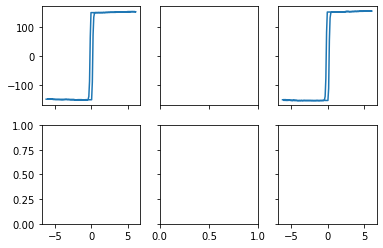

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharex='col', sharey='row')
ax[0,2].plot(make_df(files[0]).iloc[6:,0].astype(float),make_df(files[0]).iloc[6:,1].astype(float))
ax[0,0].plot(make_df(files[1]).iloc[6:,0].astype(float),make_df(files[1]).iloc[6:,1].astype(float))

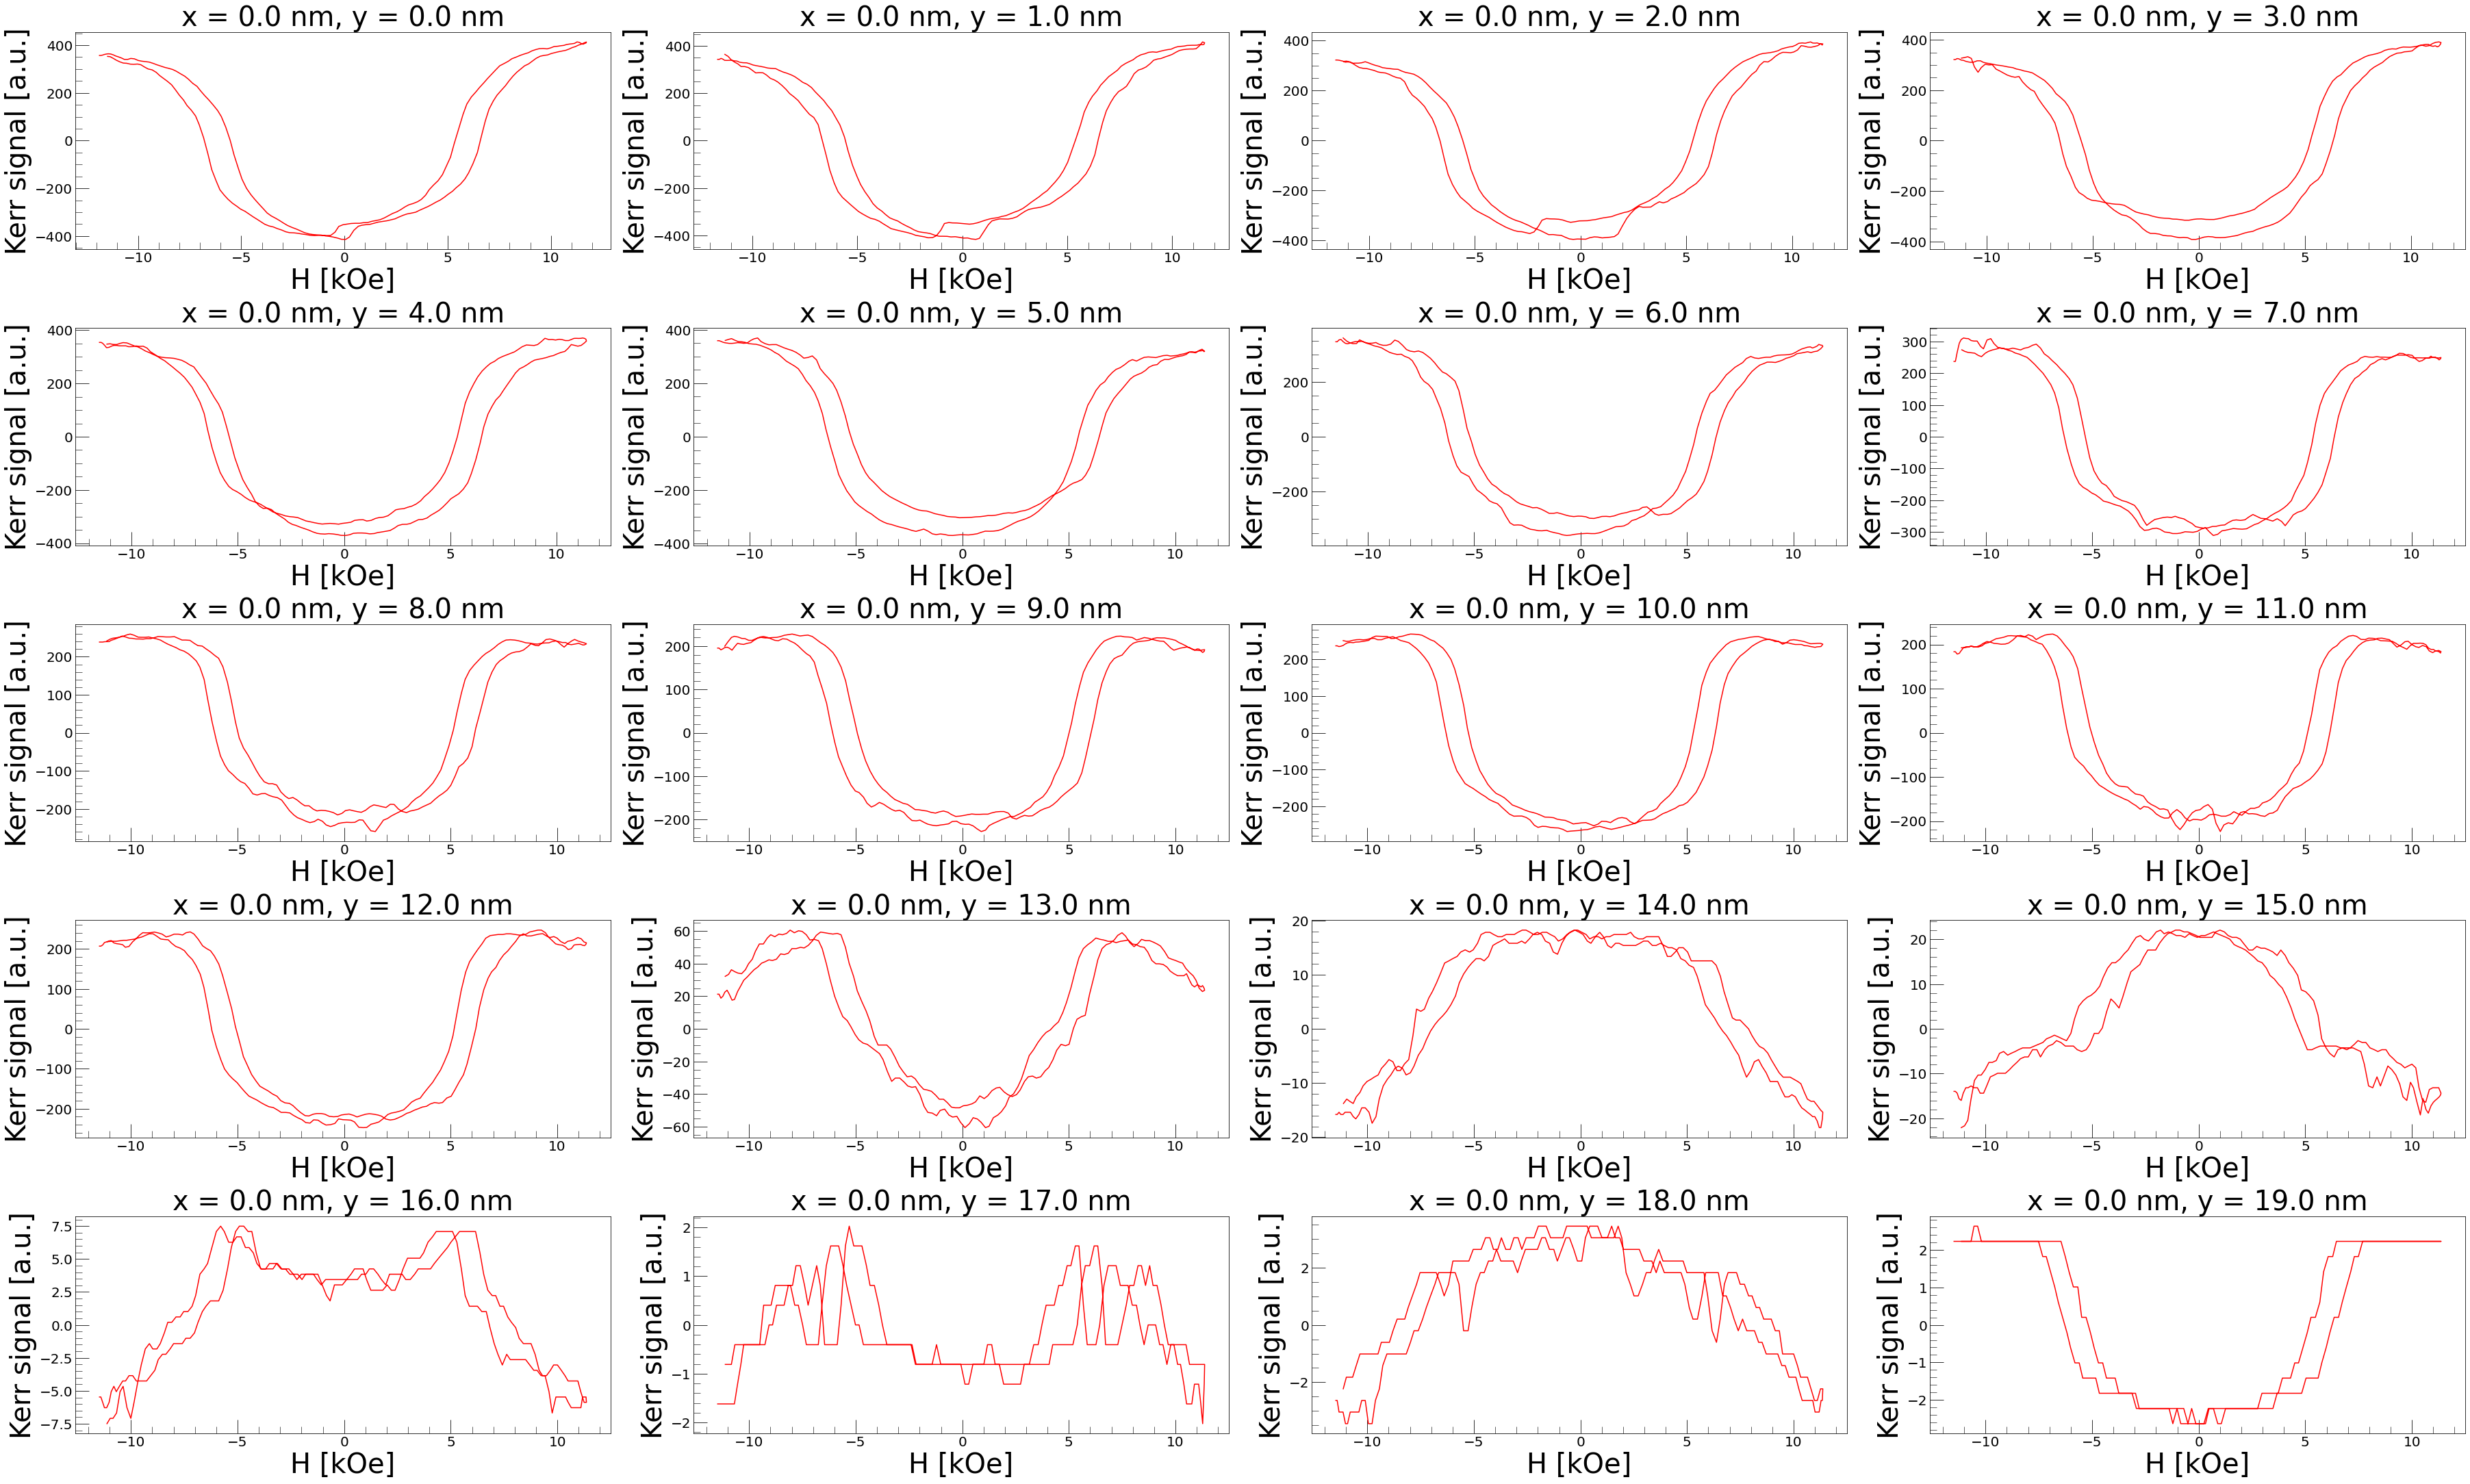

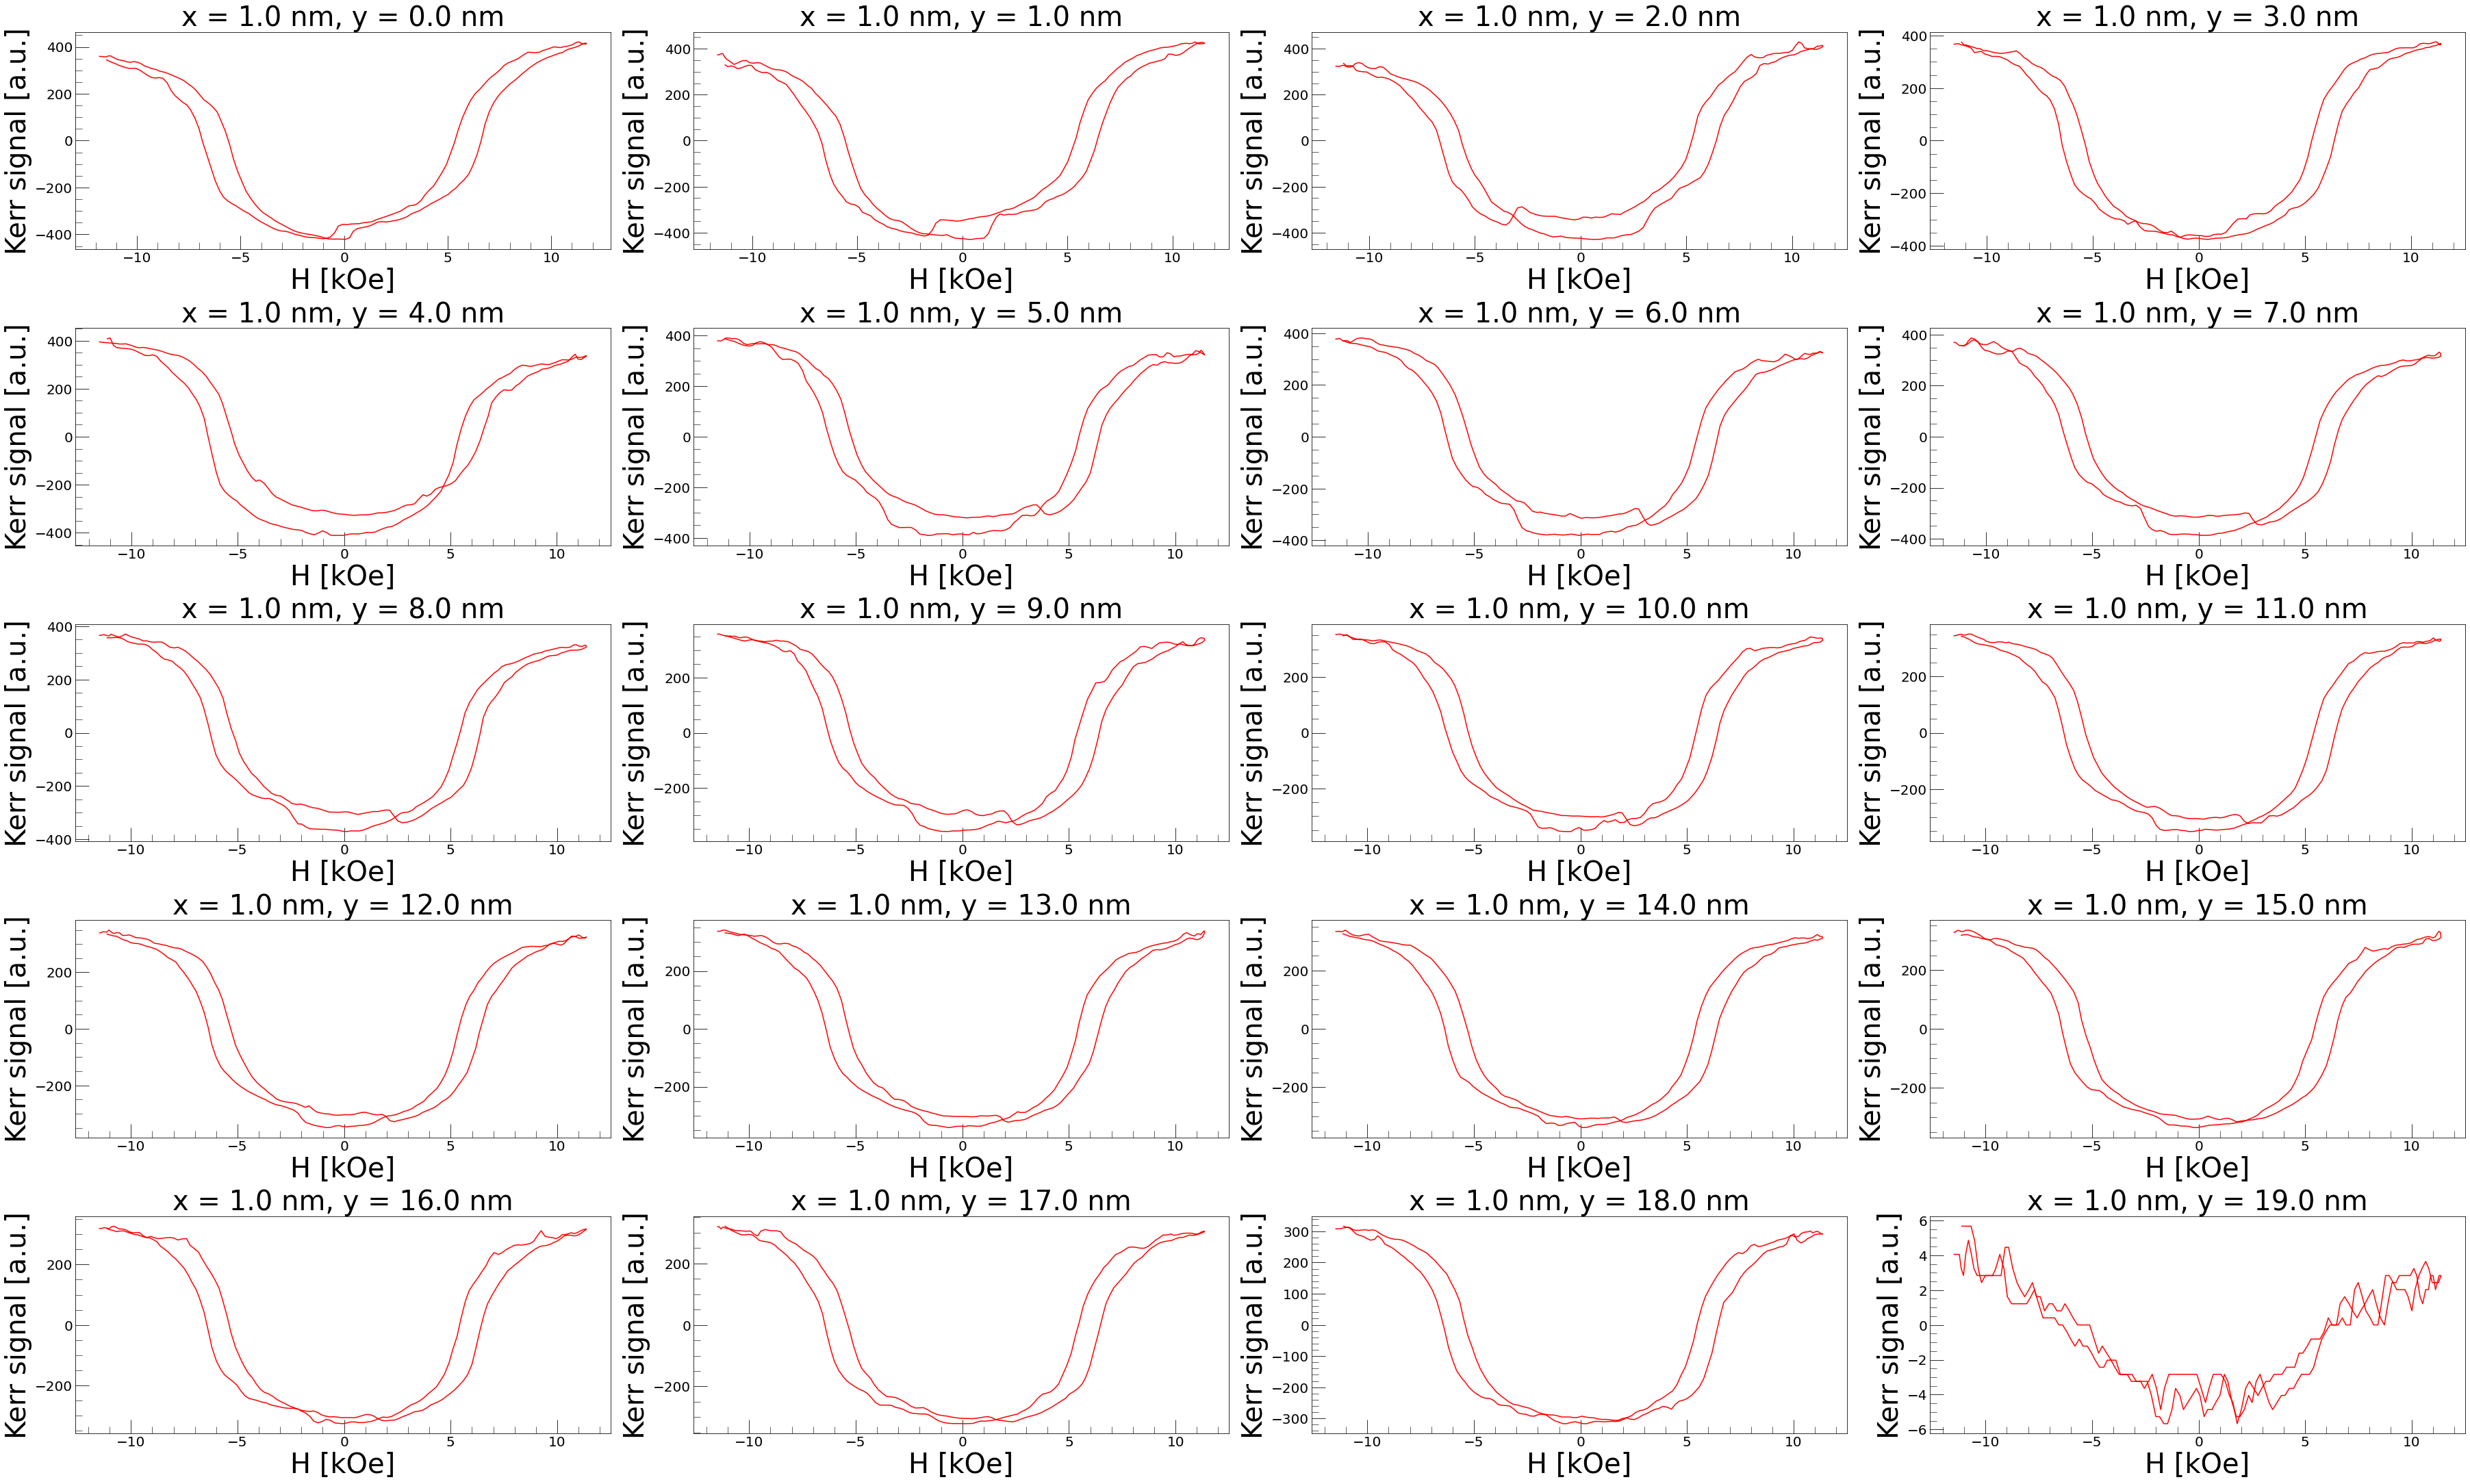

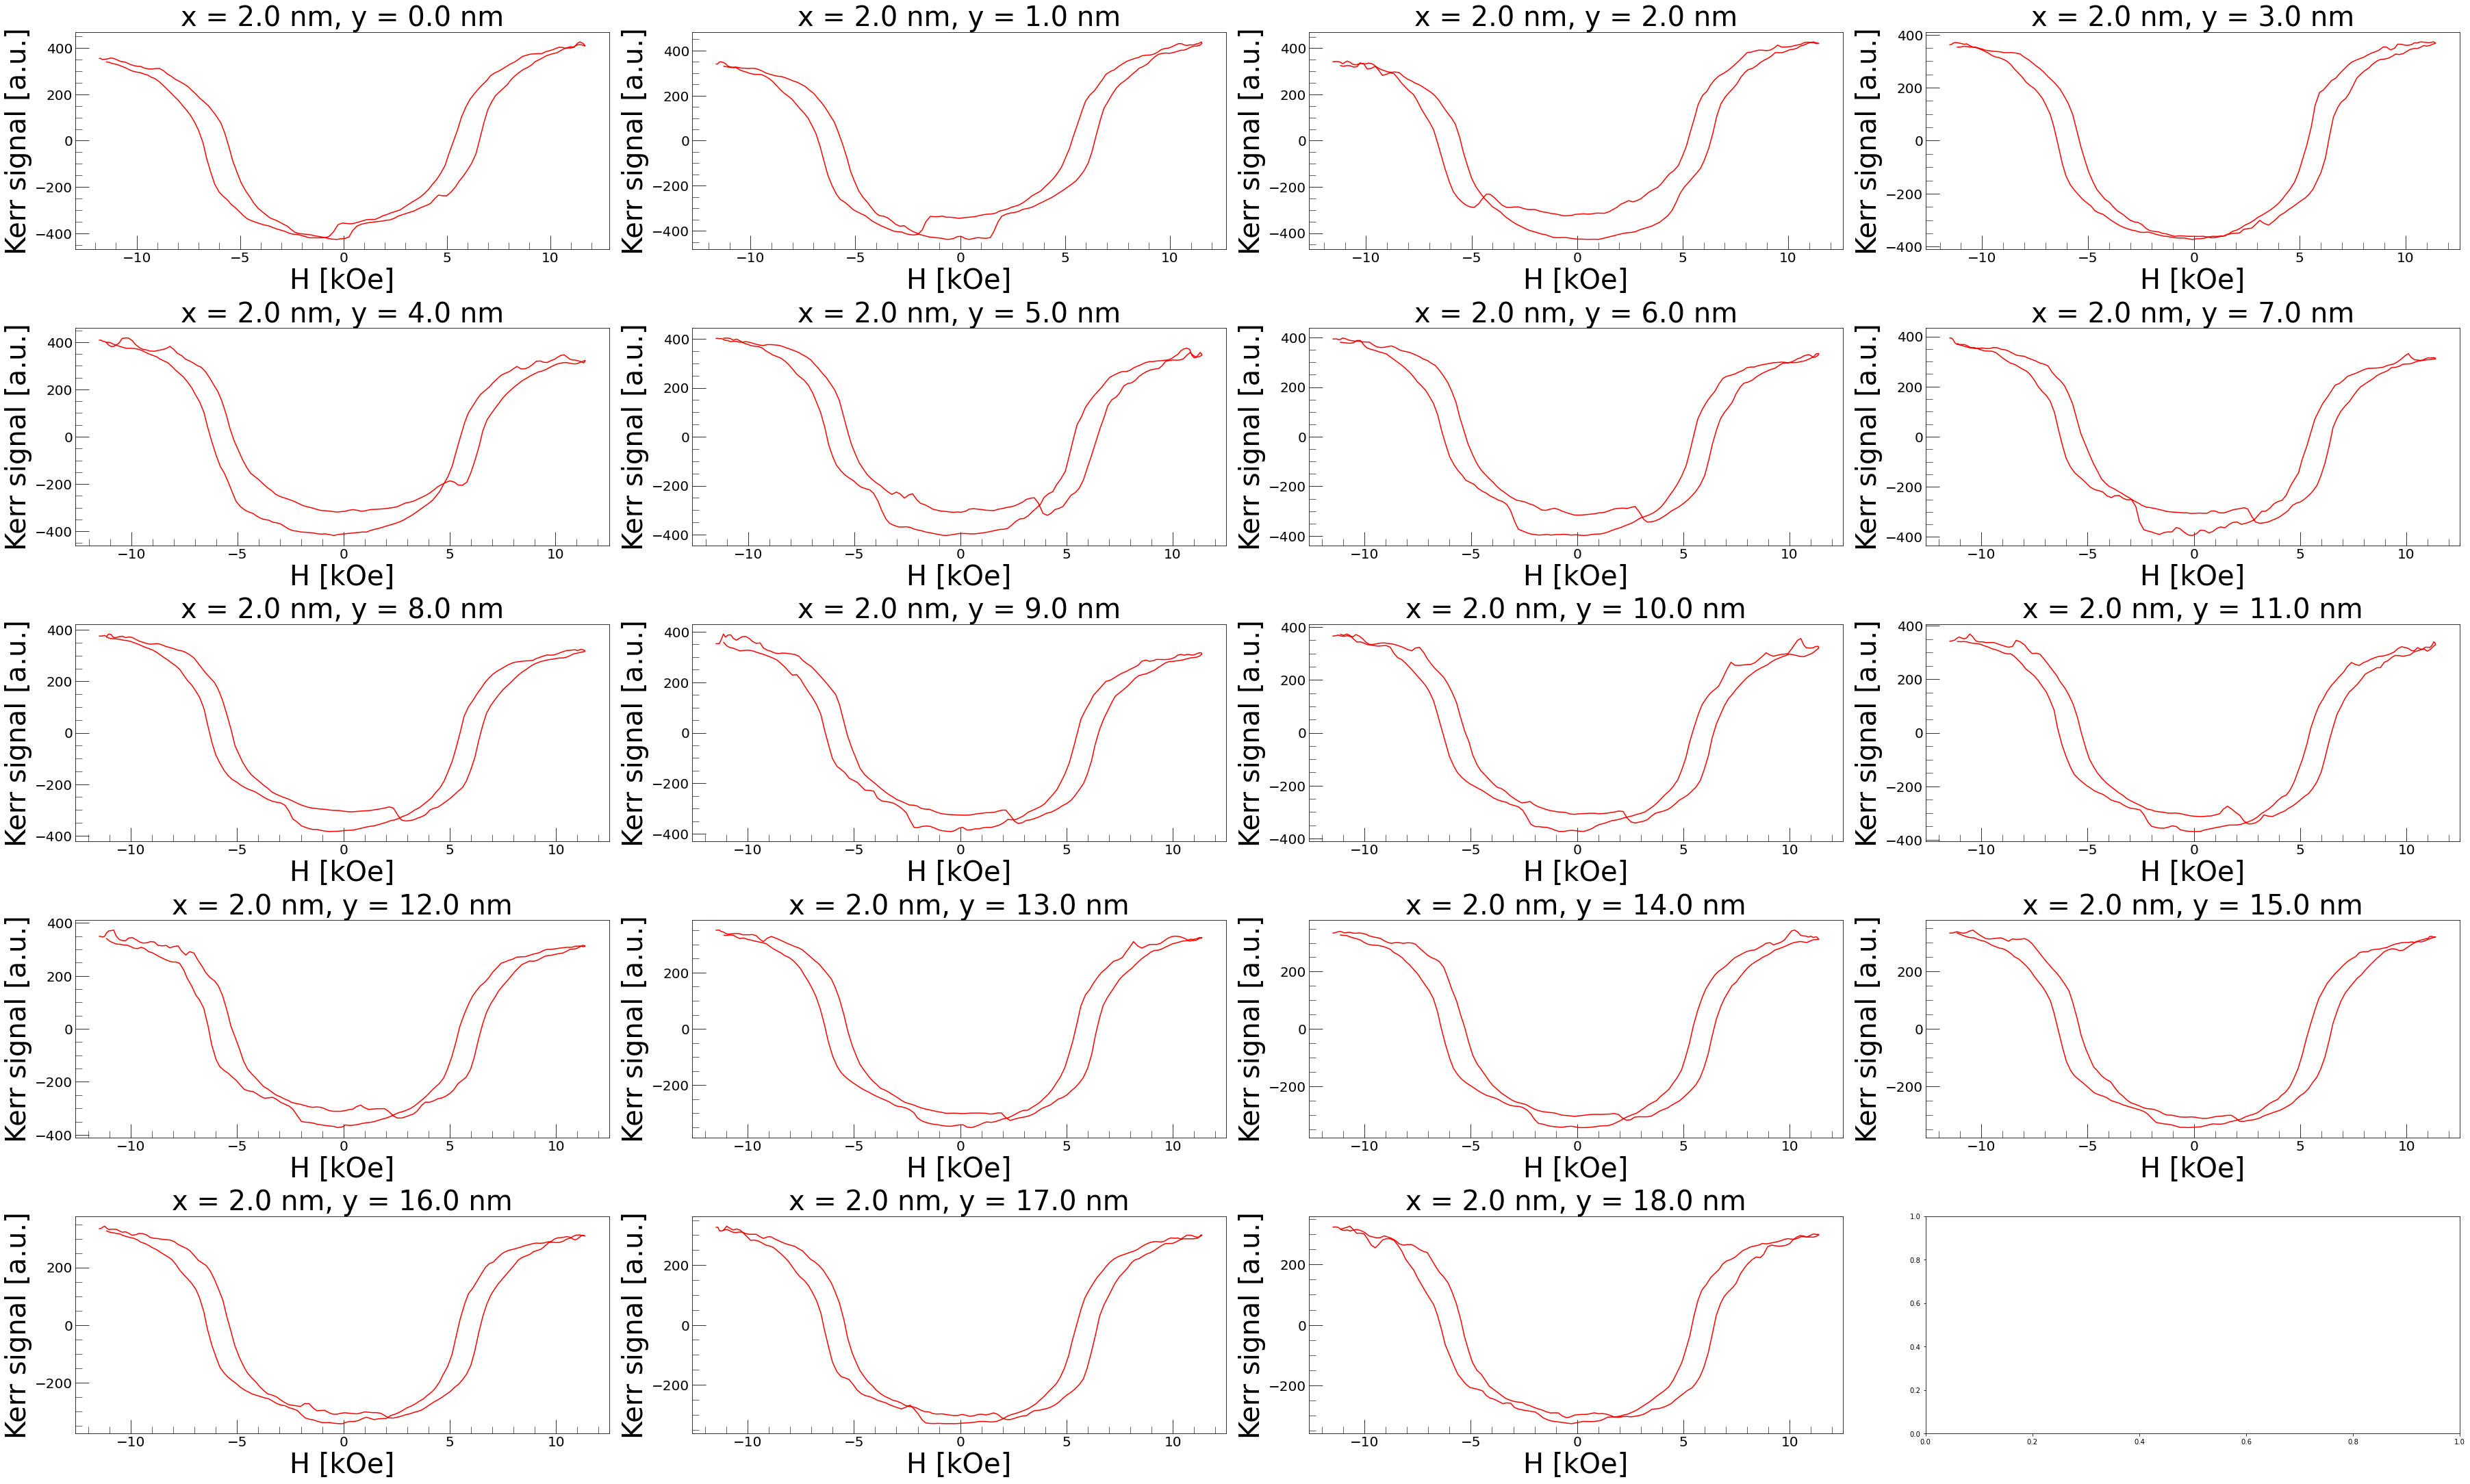

In [29]:
%%capture   
#funkcja magiczna nie pozwalająca wyświetlać outputu całej komórki. !!! ważne musi być zastosowana w pierwszej linii komórki

ncols=4
nrows=5
counter=0
Errors =list()
font=40
plt.rcParams["figure.figsize"] = (50,30)
for k in np.arange(math.ceil(len(files)/(ncols*nrows))):
    try:
    
        fig, ax = plt.subplots(nrows, ncols,constrained_layout=True)
        
        for i in np.arange(nrows):
            for j in np.arange(ncols):
                df= make_df(files[counter])
                ax[i,j].plot(df.iloc[6:,0].astype(float),df.iloc[6:,1].astype(float),"r")
                ax[i,j].set_title(f"x = {float(df.iloc[0,1])} nm, y = {float(df.iloc[1,1])} nm",fontsize=font)
                ax[i,j].set_xlabel("H [kOe]",fontsize=font)
                ax[i,j].set_ylabel("Kerr signal [a.u.]",fontsize=font)
                ax[i,j].minorticks_on()
                ax[i,j].tick_params(axis="both", which = "major", length=20, direction ="in",labelsize=20)
                ax[i,j].tick_params(axis="both", which = "minor", length=10, direction ="in")
                counter += 1
                
    except IndexError:
        Errors.append((i,j))
#zapis wszystkich plotow do listy. 1 element listy to wszystkie ploty dla danego k
figs = list(map(plt.figure, plt.get_fignums()))

In [26]:
#zapis do pdfu z listy figs
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('histerezy.pdf')
for image in figs:
    pp.savefig(image)
pp.close()